# Предсказание временных рядов

Данный шаблон решения аттестационной задачи предназначен для того, чтобы создать уже готовую структуру, на которую можно нанизывать решение задачи.

Этот шаблон универсален: идейно последовательность решения любой исследовательской задачи будет включать точно такие же шаги. Поэтому в будущем можно ориентироваться на этот шаблон.

При работе очень важно соблюдать некоторые правила оформления работы:    
- Работа пишется в третьем лице, логика построения работы должна примерно соответствовать повествовательной. Представьте, что Вы пишете работу в роли любознательного исследователя, который каждую важную мысль или наблюдение фиксирует у себя в тетради; такой подход позволит сделать чтение исследования приятнее и проще. А это важно - ведь вы пишете и оформляете тетрадь не для собственной гордости, а для того, чтобы эту информацию кто-то мог интерпритировать и использовать.
- Блоки должны всегда быть проверены на последовательность выполнения. Мы уже говорили об особенности Jupyter Notebook и Colab запускать блоки в любом порядке. Когда вы будете возвращаться к своей тетради, важно, чтобы вы могли а) запустить тетрадь и б) увидеть результат. Поэтому После окончания выполнения работы обязательно нужно "прогнать" тетрадь ещё раз - так мы убедимся, что другой человек или мы (в будущем) сможем воспроизвести исследование.
- В конце каждого большого блока/главы (к примеру, EDA) мы должны указывать выводы по проведенной работе. К примеру, логичный вывод "Введения" - фиксация того, что мы сформулировали задачи и цели. Звучит излишне, но в других блоках вывод будет гораздо важнее - если нам нужно будет вспомнить быстро результат работы, мы можем обратиться к выводам по каждой главе и понять, что было сделано и каковы результаты проделанной работы.

При сдаче работы нужно удалить этот блок 😸.

## Введение. Постановка целей и задач.

В блоке введение нам необходимо четко обозначить, **почему эта задача появилась, зачем её важно решить**. 

После того, как мы четко указали на проблему, мы можем сформулировать **цели** исследования и **задачи** исследования. Необходимо всегда помнить, что решение задач ведет к достижению целей, то есть они напрямую взаимосвязаны.

### Импорт Датафрейма, библиотек, написание функций.

В этом блоке мы импортируем все, что нам нужно для работы: библиотеки, отдельные функции, сам датасет.

In [141]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [142]:
data = sm.datasets.elnino.load_pandas()

In [143]:
df = data.data
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80
1,1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89
2,1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39
3,1953.0,24.15,26.34,27.36,27.03,25.47,23.49,22.20,21.45,21.25,20.95,21.60,22.44
4,1954.0,23.02,25.00,25.33,22.97,21.73,20.77,19.52,19.33,18.95,19.11,20.27,21.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2006.0,24.76,26.52,26.22,24.29,23.84,22.82,22.20,21.89,21.93,22.46,22.61,24.15
57,2007.0,25.82,26.81,26.41,24.96,23.05,21.61,21.05,19.95,19.85,19.31,19.82,21.15
58,2008.0,24.24,26.39,26.91,25.68,24.43,23.19,23.02,22.14,21.60,21.39,21.54,22.73
59,2009.0,24.39,25.53,25.48,25.84,24.95,24.09,23.09,22.03,21.48,21.64,21.99,23.21


### Знакомство с данными.

In [144]:
df1 = df.set_index('YEAR')
type(df1.columns)

pandas.core.indexes.base.Index

In [145]:
len(df1.columns)

12

<AxesSubplot:>

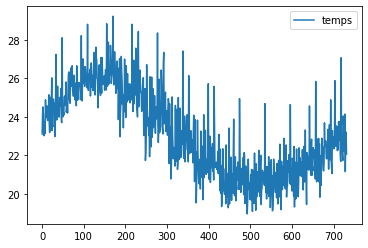

In [147]:
l = []
for year in df['YEAR']:
    for month in df1.columns:
        l.append(f'{month}-{int(year)}')
        
df3 = pd.DataFrame(l, columns=['date'])
df3.set_index('date')
list = [df1.JAN, df1.FEB, df1.MAR, df1.APR, df1.MAY, df1.JUN, df1.JUL, df1.AUG, df1.SEP, df1.OCT, df1.NOV, df1.DEC]
df3['temps'] = pd.concat(list, ignore_index=True)
df3.plot()

Этот блок посвящен первоначальному знакомству с данными

Наша задача - посмотреть на данные методами .info(), а также изучить их визуально.

Будет удобно рассматривать определенный блок - одну страну, один месяц одной страны.

Здесь же надо определиться с описанием данных - лучше всего для себя пояснить, с чем мы имеем дело. В данном случае столбцов слишком много, поэтому необходимо описать только самое важное - максимум 7-8 столбцов.

Как только у нас есть информация, что данные получены без ошибок, а также есть самое общее представление о содержимом, мы можем перейти к следующему пункту..

## Предобработка данных

### Фильтрация данных

Обычно фильтрацию данных делают позже - когда нужно непосредственно работать с данными. В нашем случае это неудобно: у нас условие, по которому мы выбираем какой-либо параметр 

С другой стороны, столбцов в задании может быть многовато. Поэтому на этом этапе нам нужно избавиться от всех ненужных столбцов. Чтобы понять, какие столбцы нужны - лучше всего вспомнить суть задачи. 


По итогу у нас должен остаться небольшой **датасет**.

### Обработка пропусков

В этом блоке мы должны понять - почему у нас есть пропуски. Главный вопрос - какова их природа? 

После того, как мы это поймем, мы можем принять решение относительно заполнения пропусков.

Главный момент: **в рамках этого задания мы не удаляем ничего, связанного с пропусками!**

Главная причина - характер работы с данными: мы работаем в этой задаче с временным промежутком, и нам важно, чтобы не было отсутствующих дат. К примеру, ситуация, когда у нас есть пропуск продолжительностью от 1 до 3 дней в середине временного промежутка, попросту неприемлима.

После обработки пропусков нам обязательно нужно проверить - всё ли в порядке. Выведите данные и проверьте заполненность. Зафиксируйте то, что пропусков больше нет.

### Вывод по этапу.


## EDA или разведочный анализ данных.

В данном блоке наша задача - познакомиться "поближе" с данными, которыми мы располагаем.

Что лучше всего сделать:    
- Сделать столбец с датами индексом;
- Вывести статистику по нужным столбцам;
- Построить графическое отображение столбцов;
- Попробовать определить - есть ли столбцы, которые мы можем отфильтровать (к примеру, самые ранние записи, где информации могло не быть и где были NaN). **- такого может и не быть**


Проделав действия выше, мы выполним минимум, необходимый для дальнейшей работы. 

Помимо этой информации, здесь же нужно всесторонне познакомиться с рассматриваемыми данными в контексте процесса/явления.

Хорошо здесь описать всё, что влияет на метрику, и что может нам помочь определить следующее: можем ли мы достоверно предсказать рост или падение метрики на основании одной переменной? Или здесь нужны методы посложнее, с большим числом входных данных и зависимостей?

Отвечайте на вопросы честно! 

Как только мы поняли, что описанной информации достаточно - можно перейти к следующему пункту.

## Построение моделей, анализ результатов.

Данный блок содержит в себе решение поставленной задачи.

В прошлых блоках мы убедились в целостности данных, их логичности, а также в том, что мы понимаем, с чем мы имеем дело. 

На этом этапе у нас должен быть объект типа DataFrame или Series, где индекс - даты, а в значениях находится нужная информация. То есть временной ряд.

В данном блоке у нас должно быть от трёх до четырех подглав:    
- Разделение датасета на тренировочную и тестовую (валидационную) выборки, проверка на статичность, построение графиков автокорреляции и частичной автокорреляции, разбивка на сезонность и тренд.
- Применение 1 способа прогнозирования;
- Применение 2 способа прогнозирования;
- (Применение 3 способа прогнозирования); **По желанию**

Первый пункт - разделение датасета - универсален, данные из него не нужно обновлять или заного рассчитывать.

Остальные три пункта содержат примерно одинаковый алгоритм действий:    
1. Описываем вкратце модель.
2. Создаем модель.
3. Обучаем модель.
4. Создаем прогноз.
5. Сравниваем прогноз и предсказание. 
6. Рассчитываем качество полученной модели и прогноза.
7. Делаем выводы по прогнозу.


Какие модели у нас есть:
- В рамках курса мы рассмотрели модель ARIMA, её улучшенную версию SARIMA. Обязательно попробуйте использовать эту модель;
- Модель экспаненционного сглаживающего среднего;
- Модель Хольта-Винтерса.

Последние 2 модели мы не изучали, поэтому можно попробовать использовать составные от модели ARIMA, которые мы рассматривали в лекции - AR, MA.

После получения прогноза отобразите графики **прогноз vs факт**, чтобы визуально можно было посмотреть на то, как точно построен прогноз. 

Как понять, подходит ли модель. Попробуйте использовать следующие методы рассчета ошибки:
- MAPE или средняя абсолютная ошибка в процентах.
- RMSE - квадратный корень из среднеквадратичной ошибки.
- MSE - среднеквадратичный корень (связан  с RMSE).

В конце - сравните полученные метрики с ошибками и выберите ту модель, которая точнее всего создает прогноз.

Ещё один важный момент - горизонт прогнозирования и сравнение прогноза с данными. Горизонт планирования нужно сделать небольшим - примерно 10-15 наблюдений (то есть 10-15 дней). И в ошибку нужно сравнивать с таким же числом наблюдений за тот же период по реальным данным!

Также отмечу, что прогноз, скорее всего, будет не самым точным, а возможно, он совсем покажет что-то непонятное.

## Выводы

В данном блоке опишите общие выводы по работе: что было сделано, что было получено. Помните, отрицательный результат - тоже результат. Поэтому указывайте информацию честно и беспристратно. 